# Project: Reception Room Optimization in a Bank
## Objective
### Analyze the layout of a bank’s reception room to enhance customer flow, optimize seating arrangements, and plan for material needs.

 This Project demonstrates the idea of reading a reception bank room AUTOCAD file Visually then apply the analysis needed to improve customer flow, resource utilization, and comfort, based on a detailed analysis of layout and furniture data. The goal is to provide actionable insights for reducing wait times, enhancing customer comfort, and maximizing staff efficiency.

# Phases of the project:
## 1- Detailed Data Collection
Gathering the data by observing the AutoCAD file to get the needed data.
1. **Furniture Attributes**: 
   - Manually inspected and recorded the type, dimensions, positions, material types, and purposes of each piece of furniture.

2. **Room Zoning**: 
   - Defined distinct zones --> (waiting area, reception desk, consultation zones) to understand traffic flow.

3. **Customer Behavior Analysis**: 
   - Observed typical customer interactions, the time spent in each area and peak times.


## 2- Data Entry and Structuring
## Collected Data manipulation by Python
Here, I used python to format the data that I collected from the AutoCAD into a suitable structure that I can use to analyze the data.

In [8]:
import pandas as pd
data = {
    "Type": ["Desk", "Chair", "Table", "Cabinet"],
    "X Position": [10, 12, 20, 25],
    "Y Position": [15, 15, 18, 22],
    "Rotation": [0, 0, 90, 45],
    "Length": [1.2, 0.5, 1.8, 2.0],
    "Width": [0.6, 0.5, 1.0, 0.8],
    "Wood Area": [2, 0.5, 3, 4],
    "Fabric Area": [1, 0.8, 0, 0]
}
df = pd.DataFrame(data)


In [9]:
df

,Type,X Position,Y Position,Rotation,Length,Width,Wood Area,Fabric Area
0,Desk,10,15,0,1.2,0.6,2.0,1.0
1,Chair,12,15,0,0.5,0.5,0.5,0.8
2,Table,20,18,90,1.8,1.0,3.0,0.0
3,Cabinet,25,22,45,2.0,0.8,4.0,0.0


## 3- Calculation of Space Utilization
Used the collected data to assess how well the office space is being used. Calculated desk density and spacing:

In [10]:
# Calculating density of Desk in the Room.
# Assuming the Reception Room is 100 sqm.
total_area = 100  
desk_area = df[df["Type"] == "Desk"]["Length"] * df[df["Type"] == "Desk"]["Width"]
desk_density = desk_area.sum() / total_area
print("Desk Density (desks per sqm):", desk_density)


Desk Density (desks per sqm): 0.0072


In [11]:
Chair_area = df[df["Type"] == "Chair"]["Length"] * df[df["Type"] == "Chair"]["Width"]
Chair_density = Chair_area.sum() / total_area
print("Chair Density (Chairs per sqm):", Chair_density)

Chair Density (Chairs per sqm): 0.0025


In [12]:
Table_area = df[df["Type"] == "Table"]["Length"] * df[df["Type"] == "Table"]["Width"]
Table_density = Table_area.sum() / total_area
print("Table Density (Tables per sqm):", Table_density)

Table Density (Tables per sqm): 0.018000000000000002


In [13]:
Cabinet_area = df[df["Type"] == "Cabinet"]["Length"] * df[df["Type"] == "Cabinet"]["Width"]
Cabinet_density = Cabinet_area.sum() / total_area
print("Cabinet Density (Cabinets per sqm):", Cabinet_density)

Cabinet Density (Cabinets per sqm): 0.016


In [15]:
total_furniture_density = desk_density + Chair_density + Table_density + Cabinet_density

In [16]:
total_furniture_density

0.0437

The calculated `total_furniture_density` of 0.0437 (or 4.37%) indicates that only a small fraction of the reception room’s total area is occupied by the furniture listed in your data. Here are some key insights based on this finding:

1. **Space Utilization**:
   - With a density of only 4.37%, the room is relatively under-utilized, with most of the space open and available. This could suggest an intentionally spacious design, potentially aimed at making the area feel open, uncluttered, and comfortable for customers.
   - Alternatively, it could indicate that more furniture could be added if needed.

2. **Comfort and Accessibility**:
   - A lower furniture density generally implies easier movement and accessibility within the room, making it more comfortable for customers and bank staff. 
   - This layout might also contribute to a welcoming, less cramped ambiance, potentially enhancing the customer experience.

3. **Capacity for Additional Furniture**:
   - Since only 4.37% of the area is occupied, there’s substantial room for adding more furniture or rearranging existing furniture if needed.
   - If the bank anticipates growth or higher customer traffic, knowing that there is room for more furniture allows flexibility in planning.


In summary, the low `total_furniture_density` suggests that the space is intentionally kept open and accessible, with potential flexibility for future additions or adjustments. This density level appears to balance both functional needs and customer comfort, though further data on customer traffic and bank goals could refine these insights.

### Density Ranges and Interpretations

1. **Very Low Density (0% - 5%)**
2. **Low Density (5% - 15%)**
3. **Moderate Density (15% - 30%)**
4. **High Density (30% - 50%)**
5. **Very High Density (Above 50%)**

### Application
When assessing a space, consider both the density and the intended purpose of the area. Factors as the room type --> waiting area, meeting space
the desired atmosphere will influence what density is appropriate. This framework can help guide design decisions and improve overall space functionality.

## 4- Material Requirement Analysis
By knowing the materials used for the previuosly mentioned furniture by making sure from the manufacturer now, I need to estimate the total needed of each material that will be used which is here wood and fabric.
Suming the wood and fabric requirements for all furniture:

In [21]:
material_summary = df[["Wood Area", "Fabric Area"]].sum()
print("Total Material Requirements:", material_summary)


Total Material Requirements: Wood Area      9.5
Fabric Area    1.8
dtype: float64


### Furniture Data

| Type    | X Position | Y Position | Rotation | Length (m) | Width (m) | Wood Area (m²) | Fabric Area (m²) |
|---------|------------|------------|----------|-------------|-----------|------------------|-------------------|
| Desk    | 10         | 15         | 0        | 1.2         | 0.6       | 2.0              | 1.0               |
| Chair   | 12         | 15         | 0        | 0.5         | 0.5       | 0.5              | 0.8               |
| Table   | 20         | 18         | 90       | 1.8         | 1.0       | 3.0              | 0.0               |
| Cabinet | 25         | 22         | 45       | 2.0         | 0.8       | 4.0              | 0.0               |

### Total Material Requirements

- **Total Wood Area**:
  - Desk: 2.0 m²
  - Chair: 0.5 m²
  - Table: 3.0 m²
  - Cabinet: 4.0 m²

  **Total Wood Area Needed:**
  \[
  2.0 + 0.5 + 3.0 + 4.0 = 9.5 \text{ m²}
  \]

- **Total Fabric Area**:
  - Desk: 1.0 m²
  - Chair: 0.8 m²
  - Table: 0.0 m²
  - Cabinet: 0.0 m²

  **Total Fabric Area Needed:**
  \[
  1.0 + 0.8 + 0.0 + 0.0 = 1.8 \text{ m²}
  \]

### Summary

In conclusion, the total material requirements for the reception room furniture are:

- **Total Wood Required**: **9.5 m²**
- **Total Fabric Required**: **1.8 m²**


## 4- Generate Visual Insights
Plotting the furniture distribution to show layout density visually.

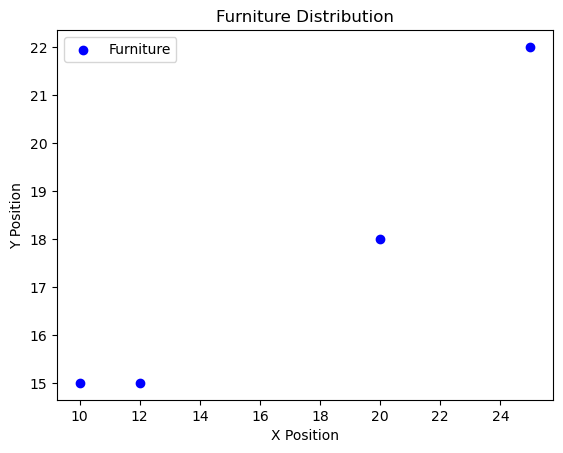

In [22]:
import matplotlib.pyplot as plt

plt.scatter(df["X Position"], df["Y Position"], c="blue", label="Furniture")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Furniture Distribution")
plt.legend()
plt.show()


## 6. Insights and Reporting

### Space Optimization
By observing the space occupied by the furniture and their distribution, it is evident that there is significant space available that can accommodate more furniture if needed. This flexibility allows for adjustments based on visitor traffic and needs.

### Material Planning
Estimated wood and fabric requirements have been calculated based on the current furniture layout:
- **Total Wood Required**: **9.5 m²**
- **Total Fabric Required**: **1.8 m²**

This information is crucial for future procurement and budgeting.

### Efficiency Improvements
Increasing the number of furniture pieces can enhance the comfort of bank visitors, making the reception area more accommodating. However, care should be taken to avoid overcrowding, which can detract from the overall experience. Maintaining a balance between functionality and comfort is essential.

### Additional Insights
- **Visitor Experience**: The open space layout contributes to a positive visitor experience, fostering a welcoming atmosphere. Keeping the area clear and comfortable can help reduce wait times and improve service efficiency.
  
- **Furniture Arrangements**: Consider exploring various furniture arrangements to maximize the use of space while ensuring accessibility. Flexible furniture options (like modular seating) could further enhance adaptability to changing needs.

- **Future Needs Assessment**: Regular assessments of visitor traffic patterns and feedback can help determine if additional furniture is needed in the future, ensuring the space evolves with the bank's operational needs.

- **Sustainability Considerations**: As new furniture is added, selecting sustainable materials could align with the bank's corporate responsibility goals and enhance its reputation among environmentally conscious clients.
